importing data set  url and saving it as a const

In [43]:
url="https://raw.githubusercontent.com/csetapan/car_sales_data/refs/heads/main/Car_sales.csv"



CREATING DATA FRAME USING PANDAS



In [44]:
import pandas as pd
url="https://raw.githubusercontent.com/csetapan/car_sales_data/refs/heads/main/Car_sales.csv"
data=pd.read_csv(url)
df= pd.DataFrame(data)
print(df.head())                                                                                                        
print(df.info())
print(df.describe())
print(df.isnull().sum())


  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

FREQUENTLY SOLD CAR BRANDS


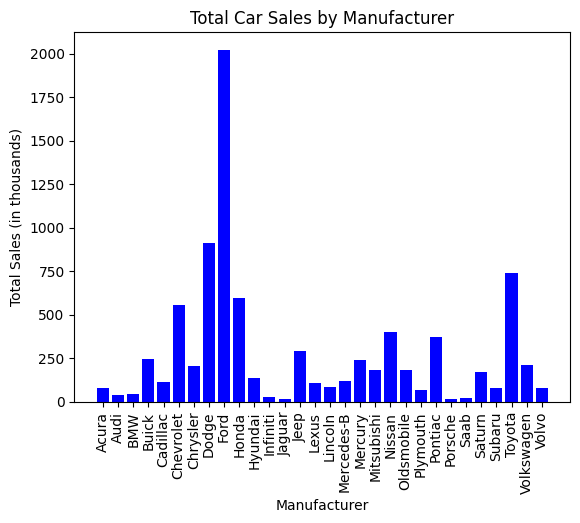

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/csetapan/car_sales_data/refs/heads/main/Car_sales.csv"
data=pd.read_csv(url)
df= pd.DataFrame(data)


# Grouping Manufacturers and calculating sales accordingly 
x=df.groupby('Manufacturer')
y=df.groupby('Manufacturer')['Sales_in_thousands'].sum()

plt.bar(y.index, y, color='blue')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales (in thousands)')
plt.title('Total Car Sales by Manufacturer')

# Roatating x labels for better visibility 
plt.xticks(rotation=90)
plt.show()


HENCE, FORD HAS THE HIGHEST UNTS OF CARS SOLD ACCORDING TO THE CARS SALES DATASET


ANALYSING DATA TRENDS WITH RESALE PRICE AND OTHER ATTRIBUTES

EDA (EXPLORATORY DATA ANALYSIS)


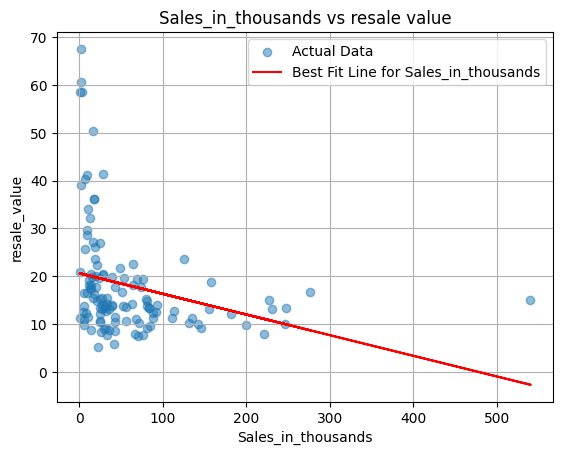

R² for Sales_in_thousands: 0.08
Best fit line for Sales_in_thousands: y = -0.04x + 20.60


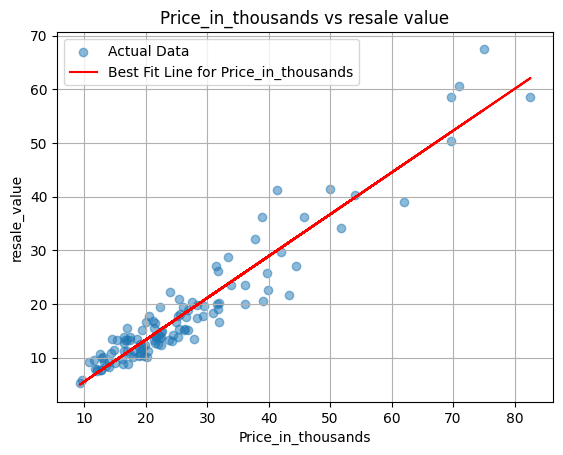

R² for Price_in_thousands: 0.91
Best fit line for Price_in_thousands: y = 0.78x + -2.28


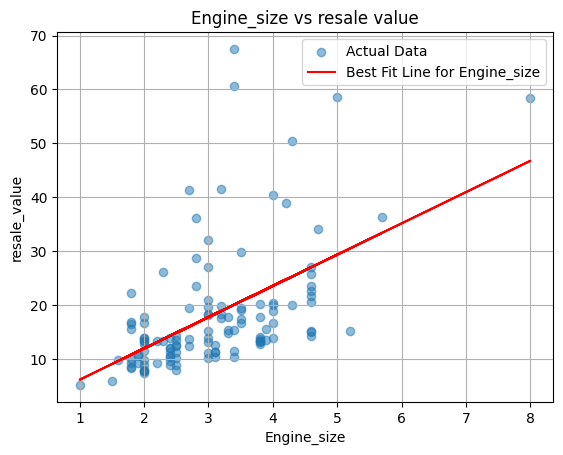

R² for Engine_size: 0.28
Best fit line for Engine_size: y = 5.81x + 0.29


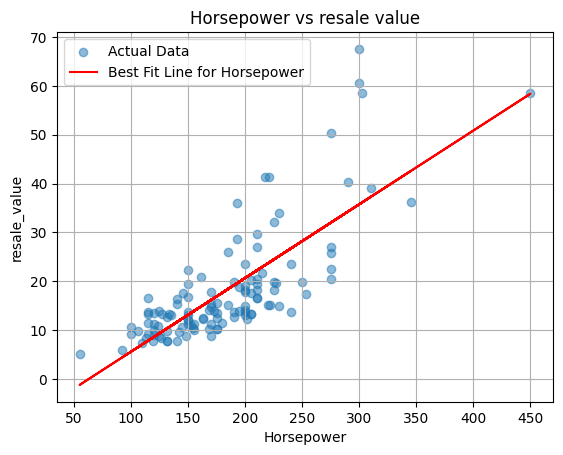

R² for Horsepower: 0.59
Best fit line for Horsepower: y = 0.15x + -9.48


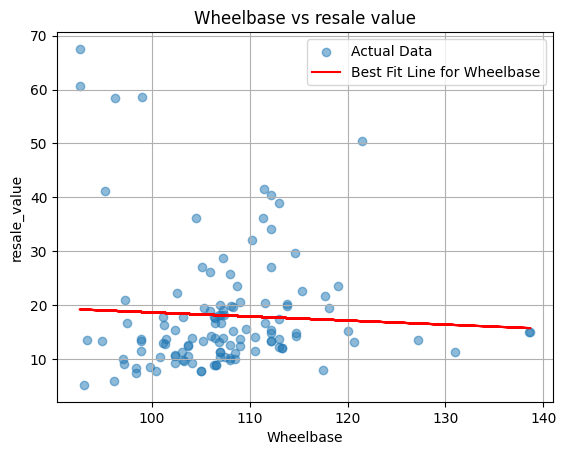

R² for Wheelbase: 0.00
Best fit line for Wheelbase: y = -0.08x + 26.15


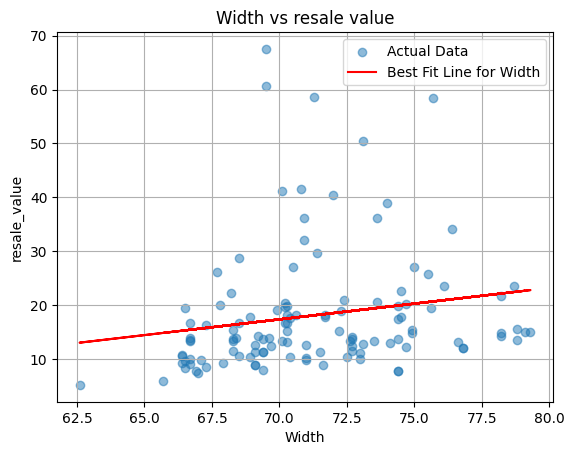

R² for Width: 0.03
Best fit line for Width: y = 0.58x + -23.58


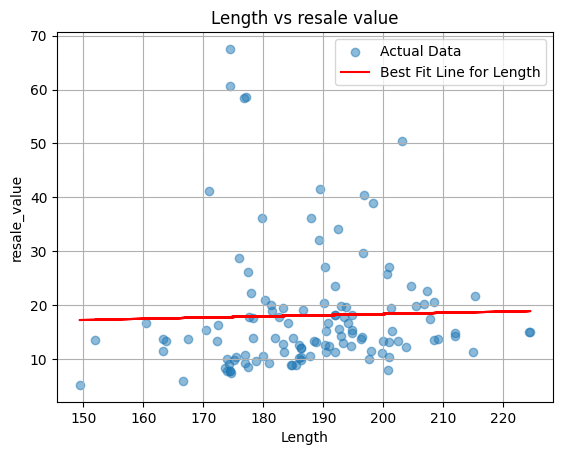

R² for Length: 0.00
Best fit line for Length: y = 0.02x + 13.90


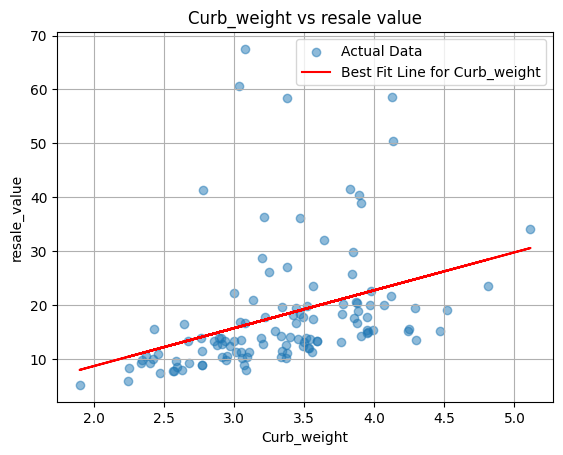

R² for Curb_weight: 0.13
Best fit line for Curb_weight: y = 7.03x + -5.40


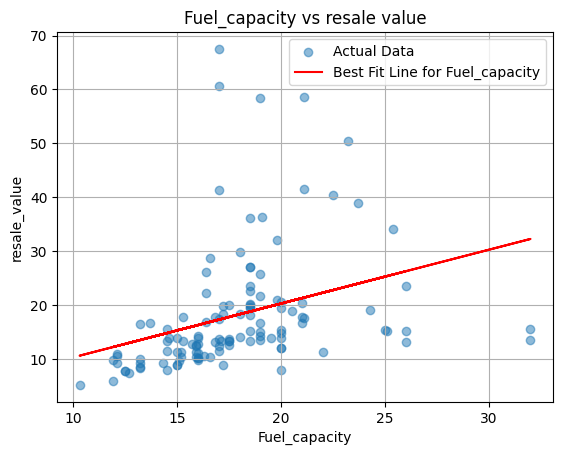

R² for Fuel_capacity: 0.11
Best fit line for Fuel_capacity: y = 1.00x + 0.27


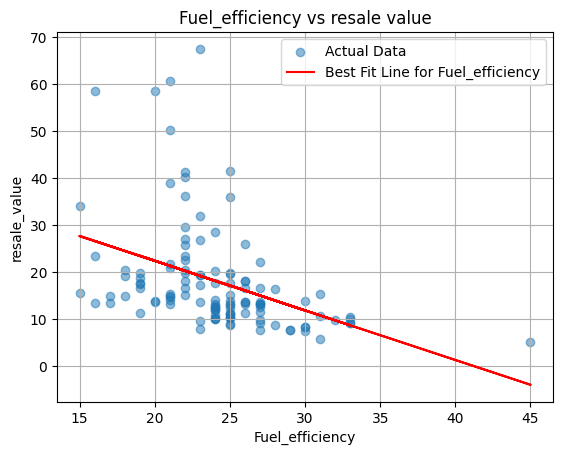

R² for Fuel_efficiency: 0.16
Best fit line for Fuel_efficiency: y = -1.05x + 43.54


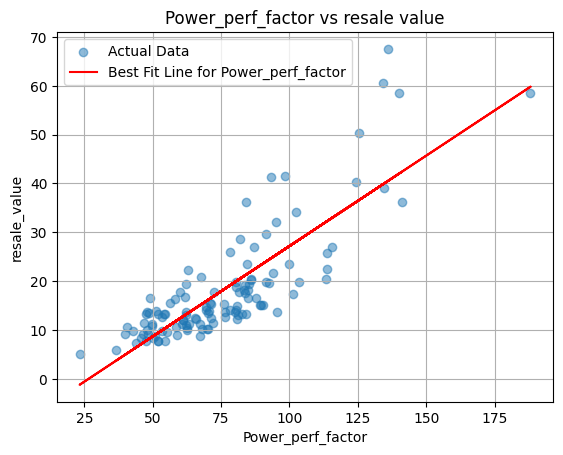

R² for Power_perf_factor: 0.68
Best fit line for Power_perf_factor: y = 0.37x + -9.80


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url="https://raw.githubusercontent.com/csetapan/car_sales_data/refs/heads/main/Car_sales.csv"
data=pd.read_csv(url)
df= pd.DataFrame(data)

def trend_check(df, x):
    y = df["__year_resale_value"]
    x2 = df[x]

    # Remove NaNs
    mask = ~np.isnan(x2) & ~np.isnan(y)
    x2 = x2[mask]
    y = y[mask]

    # Fit line
    m, c = np.polyfit(x2, y, 1)
    y_pred = m * x2 + c

    # Plotting
    plt.figure()
    plt.scatter(x2, y, label='Actual Data', alpha=0.5)
    plt.plot(x2, y_pred, color='red', label=f'Best Fit Line for {x}')
    plt.xlabel(x)
    plt.ylabel('resale_value')
    plt.title(f"{x} vs resale value")  # Fixed title
    plt.legend()
    plt.grid(True)
    plt.show()
    r_squared = np.corrcoef(x2, y)[0, 1]**2
    print(f"R² for {x}: {r_squared:.2f}")


    return m, c

cols=df.columns.tolist()
to_rem=['__year_resale_value','Vehicle_type','Manufacturer','Model','Latest_Launch']
for i in to_rem:
    cols.remove(i)

for x in cols:
    m, c = trend_check(df, x)
    print(f"Best fit line for {x}: y = {m:.2f}x + {c:.2f}")




SINCE, PRICE_IN_THOUSANDS , HORSEPOWER AND POWER_PERFORMANCE_FACTOR HAVE GOOD Rsquare SCORES .
THIS IMPLIES THEY HAVE BETTER RELATIONS WITH THE RESALE VALUE ATTRIBUTE.
AND ML MODELS CAN BE TRAINED TO GET EFFICIENT OUTPUTS.


TRAINING PREDICTION MODELS ON ABOVE MENTIONED ATTRIBUTES FOR BETTER LEARNING OF MODEL.


BUT FIRST FINDING OUT NUMBER OF VALUES

In [47]:
import pandas as pd
url="https://raw.githubusercontent.com/csetapan/car_sales_data/refs/heads/main/Car_sales.csv"
data=pd.read_csv(url)
df= pd.DataFrame(data)
df.isnull().sum()


Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

BUT FIRST WE START WITH CLEANING DATA AND FILLING UP NaN VALUES

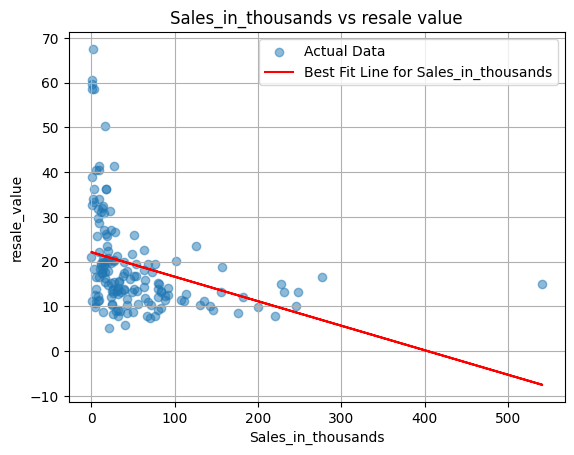

R² for Sales_in_thousands: 0.11
Best fit line for Sales_in_thousands: y = -0.05x + 22.10


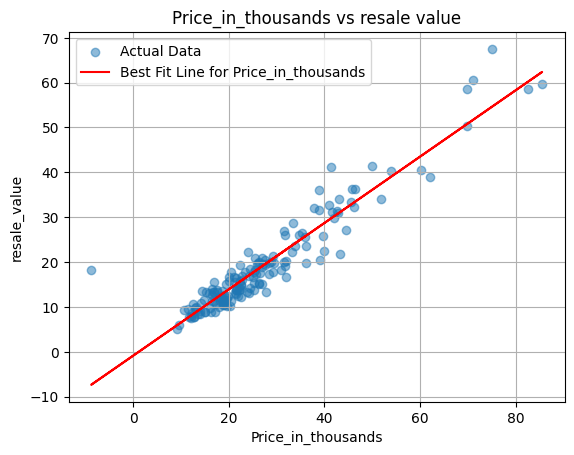

R² for Price_in_thousands: 0.89
Best fit line for Price_in_thousands: y = 0.74x + -0.91


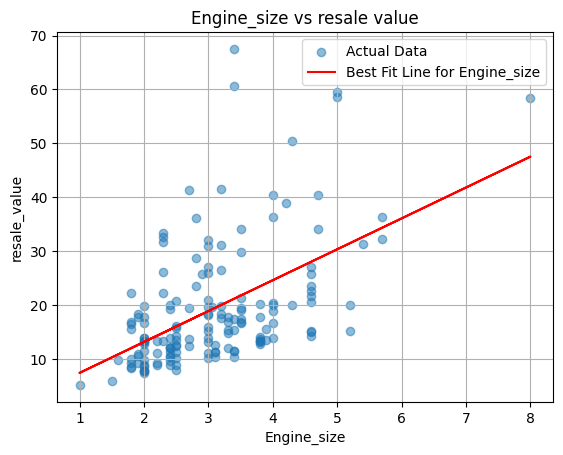

R² for Engine_size: 0.27
Best fit line for Engine_size: y = 5.74x + 1.64


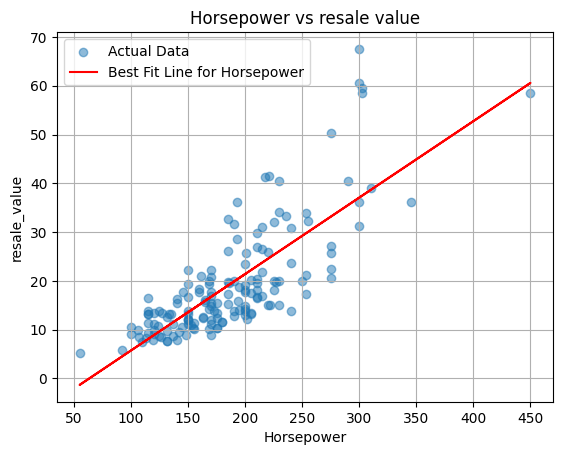

R² for Horsepower: 0.60
Best fit line for Horsepower: y = 0.16x + -9.95


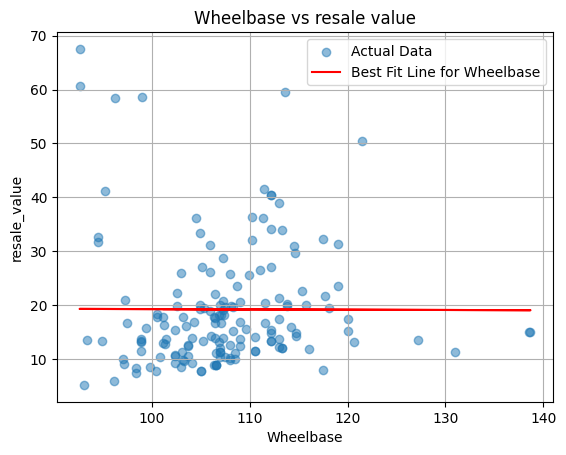

R² for Wheelbase: 0.00
Best fit line for Wheelbase: y = -0.01x + 19.77


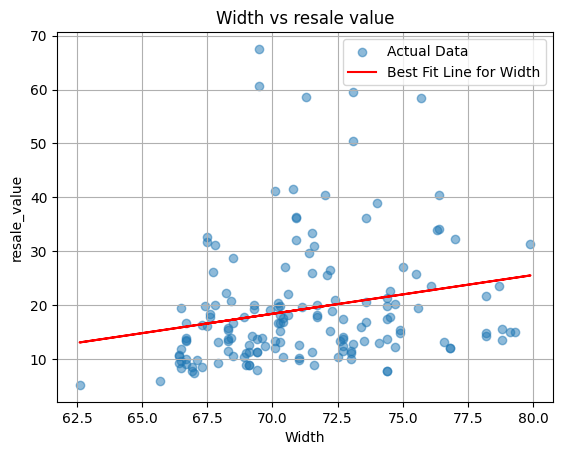

R² for Width: 0.05
Best fit line for Width: y = 0.72x + -31.99


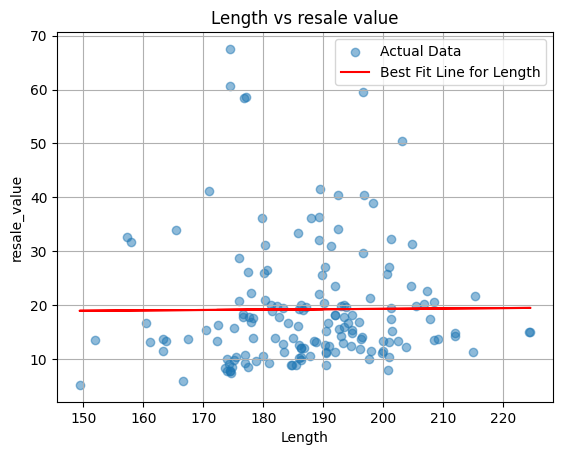

R² for Length: 0.00
Best fit line for Length: y = 0.01x + 17.87


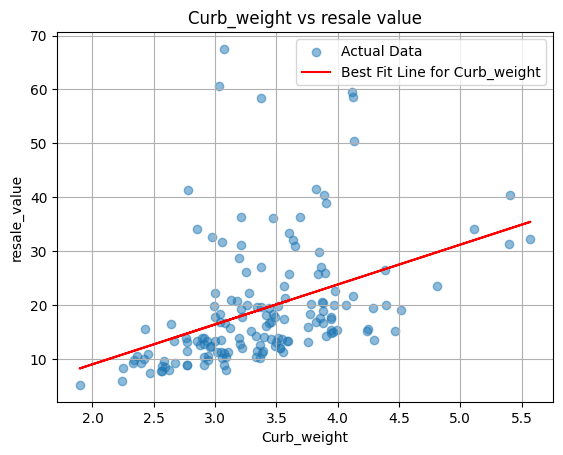

R² for Curb_weight: 0.17
Best fit line for Curb_weight: y = 7.41x + -5.85


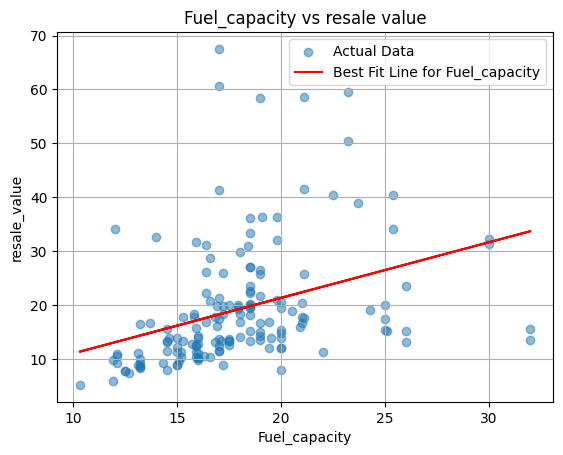

R² for Fuel_capacity: 0.12
Best fit line for Fuel_capacity: y = 1.03x + 0.68


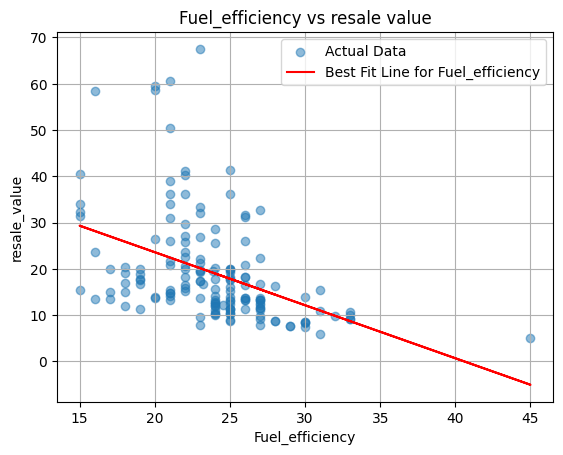

R² for Fuel_efficiency: 0.18
Best fit line for Fuel_efficiency: y = -1.15x + 46.52


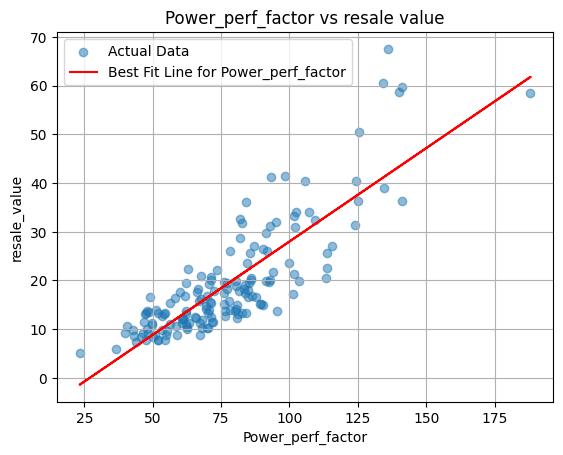

R² for Power_perf_factor: 0.70
Best fit line for Power_perf_factor: y = 0.38x + -10.33


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
url="https://raw.githubusercontent.com/csetapan/car_sales_data/refs/heads/main/Car_sales.csv"
data=pd.read_csv(url)
df= pd.DataFrame(data)

# Using Iterative Imputer to fill NaN values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])))
df_imputed.columns = df.select_dtypes(include=[np.number]).columns
df_imputed

# Again preparatory EDA
def trend_check(df, x):
    y = df["__year_resale_value"]
    x2 = df[x]

    # Remove NaNs
    # mask = ~np.isnan(x2) & ~np.isnan(y)
    # x2 = x2[mask]
    # y = y[mask]

    # Fit line
    m, c = np.polyfit(x2, y, 1)
    y_pred = m * x2 + c

    # Plotting
    plt.figure()
    plt.scatter(x2, y, label='Actual Data', alpha=0.5)
    plt.plot(x2, y_pred, color='red', label=f'Best Fit Line for {x}')
    plt.xlabel(x)
    plt.ylabel('resale_value')
    plt.title(f"{x} vs resale value")  # Fixed title
    plt.legend()
    plt.grid(True)
    plt.show()
    r_squared = np.corrcoef(x2, y)[0, 1]**2
    print(f"R² for {x}: {r_squared:.2f}")


    return m, c

cols=df.columns.tolist()
to_rem=['__year_resale_value','Vehicle_type','Manufacturer','Model','Latest_Launch']
for i in to_rem:
    cols.remove(i)

for x in cols:
    m, c = trend_check(df_imputed, x)
    print(f"Best fit line for {x}: y = {m:.2f}x + {c:.2f}")




AFTER CLEANING DATA AND DOUBLE CHECKING PREPARATORY EDA WE MOVE TO MODEL TRAINING

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
url="https://raw.githubusercontent.com/csetapan/car_sales_data/refs/heads/main/Car_sales.csv"
data=pd.read_csv(url)
df= pd.DataFrame(data)

# Using Iterative Imputer to fill NaN values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])))
df_imputed.columns = df.select_dtypes(include=[np.number]).columns


# Adding back non-numeric columns
for col in df.select_dtypes(exclude=[np.number]).columns:
    df_imputed[col] = df[col]
df_final=df_imputed

# Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets

x=df_final[['Price_in_thousands', 'Horsepower', 'Power_perf_factor']]
y=df_final['__year_resale_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(x_train, y_train)
# Making predictions
y_pred = model.predict(x_test)
# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
accuracy = model.score(x_test, y_test)
print(df_final.head(10))
print(f"R²: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Accuracy: {accuracy:.2f}")





   Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919             16.36000           21.500000          1.8   
1              39.384             19.87500           28.400000          3.2   
2              14.114             18.22500           -8.740589          3.2   
3               8.588             29.72500           42.000000          3.5   
4              20.397             22.25500           23.990000          1.8   
5              18.780             23.55500           33.950000          2.8   
6               1.380             39.00000           62.000000          4.2   
7              19.747             20.79773           26.990000          2.5   
8               9.231             28.67500           33.400000          2.8   
9              17.527             36.12500           38.900000          2.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0       140.0      101.2   67.3   172.4        2.639       

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
